In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # for 3D graphs

In [2]:
### 1) Generate random input data to train on ###

observations = 1000 # aka "n"

# f(x, z) = a*x + b*z + c
# size = n by k matrix, where n = # of observations and k = # of variables
xs = np.random.uniform(low=-10, high=10, size=(observations, 1))
zs = np.random.uniform(-10, 10, (observations, 1))

inputs = np.column_stack((xs, zs)) # Stacks sequence of 1D arrays into a single 2D array
print(inputs.shape) # (1000, 2)

(1000, 2)


In [3]:
### 2) Create the targets we will aim at ###

# arbitrarily choosing targets as targets = f(x, z) = 2*x - 3*z + 5 + noise. w1=2, w2=-3, b=5
# ^ The algorithm will learn this function
# !! Note: Noise is introduced to randomize data a little, as real data always contains noise, and is never perfect.

noise = np.random.uniform(-1, 1, (observations, 1))
targets = 2*xs - 3*zs + 5 + noise
print(targets.shape) # (1000, 1)

(1000, 1)


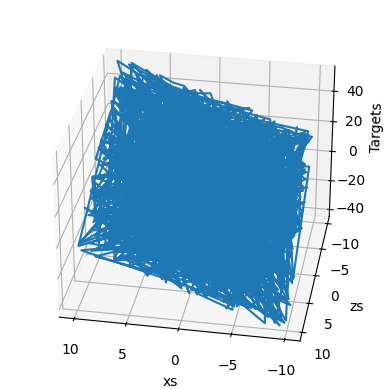

In [4]:
### 3) Plot the training data (not necessary, but shows linear relationship (i.e., plane in 3D)) ###

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot(xs, zs, targets)
ax.set_xlabel("xs")
ax.set_ylabel("zs")
ax.set_zlabel("Targets")
ax.view_init(azim=100)
plt.show()

In [5]:
# 4) Initialize variables and set learning rate

init_range = 0.1
weights = np.random.uniform(-init_range, init_range, (2,1)) # size = 2x1 or (2, 1)
biases = np.random.uniform(-init_range, init_range, 1) # size = 1x1

learning_rate = 0.02

In [6]:
# 6) Train the model

for i in range(100):

    # 6a) Calculate outputs
    outputs = np.dot(inputs, weights) + biases # 1000x2 dot 2x1 + scalar. Alternatively, use A.dot(B)

    # 6b) Compare outputs to targets through the loss
    deltas = outputs - targets # 1000x1
    loss = np.sum(deltas ** 2) / 2 / observations # L2-norm loss formula
    print(loss) # Track for each iteration

    # 6c) Adjust weight and biases
    deltas_scaled = deltas / observations
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled) # 2x1 = 2x1 - scalar * 2x1000 dot 1000x1
    biases = biases - learning_rate * np.sum(deltas_scaled) # 1x1 = 1x1 - scalar * sum(1000x1) = 1x1 - scalar * scalar

227.7382999013802
32.34879976013189
13.8403991380533
11.706562632337924
11.103660599744238
10.65834231784288
10.242971256837714
9.84513696092452
9.463108922689669
9.096167317305843
8.743707880785161
8.405158256369644
8.079969420645844
7.767614086218782
7.467585781341756
7.17939802264555
6.902583525766742
6.636693447613959
6.381296658582862
6.135979043497144
5.900342830138112
5.674005944273706
5.456601390141179
5.247776655378866
5.047193139442179
4.854525604577029
4.669461648460461
4.491701197653403
4.320956021044152
4.156949262493752
3.999414991925357
3.848097774129794
3.7027522545880664
3.5631427616393148
3.4290429243490963
3.300235305458423
3.1765110488183677
3.0576695407385768
2.9435180847006
2.833871588908557
2.728552266170579
2.627389345624314
2.5302187958391555
2.436883058846157
2.347230794664395
2.261116635909537
2.178400952086737
2.0989496231856406
2.0226338222104197
1.9493298062922013
1.8789187160452006
1.8112863828412138
1.7463231436899782
1.6839236634252372
1.623986763908185

[[ 1.99604866]
 [-2.99408675]] , [4.3615687]
(1000, 1)


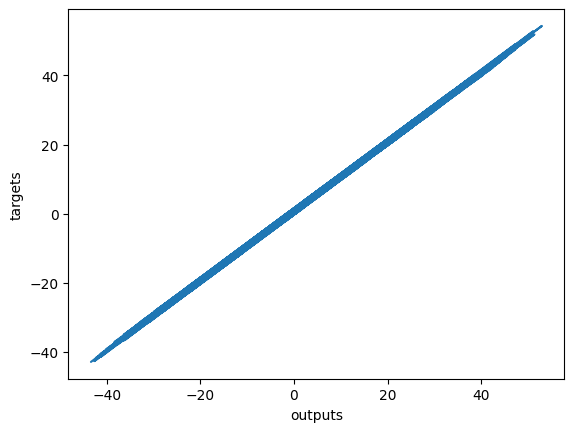

In [7]:
# 7) Analyze results

# 7a) Compare trained weights and biases to target
print(weights, ",", biases)
# Recall that targets = 2*xs - 3*zs + 5 + noise
# Printed: [[ 2.00268772] [-2.99893916]] , [4.3160094] after the training range(100) for loop ran once
# Printed: [[ 1.9989976 ] [-2.99737761]] , [4.96636472] after the training range(100) for loop ran 3 times total

# 7b) Plot outputs vs targets
plt.plot(outputs, targets)
plt.xlabel("outputs")
plt.ylabel("targets")
plt.show()